In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

44532


In [2]:
from ImageAnalysis3 import _distance_zxy
from ImageAnalysis3.figure_tools.color import transparent_gradient
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
_color_dict={
    'A':[1.,0.,0.],
    'B':[0.,0.,1.],
}
# 3d plotting
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes # 3d cloud calculation


In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
plt.style.use('dark_background')

matplotlib.rcParams['pdf.fonttype'] = 42


In [7]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print("PostAnalysis Folder:", postanalysis_folder)
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print("Figure Folder:", figure_folder)

contact_figure_folder = os.path.join(figure_folder, 'LongRangeContacts')
if not os.path.exists(contact_figure_folder):
    print(f"Create contact_figure_folder: {contact_figure_folder}")
    os.makedirs(contact_figure_folder)
else:
    print(f"Use contact_figure_folder: {contact_figure_folder}")
comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')
if not os.path.exists(comp_figure_folder):
    print(f"Create comp_figure_folder: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use comp_figure_folder: {comp_figure_folder}")
    
example_figure_folder = os.path.join(figure_folder, '3D_rendering')
if not os.path.exists(example_figure_folder):
    print(f"Create example_figure_folder: {example_figure_folder}")
    os.makedirs(example_figure_folder)
else:
    print(f"Use example_figure_folder: {example_figure_folder}")

PostAnalysis Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
Figure Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use contact_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\LongRangeContacts
Use comp_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\AB_compartment
Use example_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\3D_rendering


# Load codebook

In [8]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

# Load chr2Zxys

In [9]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

## select cells

In [36]:
from ImageAnalysis3.figure_tools.plot_decode import Centering_Chr2ZxysListDict, summarize_chr2Zxys
from ImageAnalysis3.structure_tools.distance import sort_chr

In [20]:
genome_cmap = cm.Spectral.copy()

In [12]:
sel_subclass = 'L2/3 IT'
sel_cell_indices = []
for _cell_index, _chr2Zxys in enumerate(subclass_2_chr2ZxysList[sel_subclass]):
    if len(_chr2Zxys) >= 20:
        sel_cell_indices.append(_cell_index)

In [23]:
_sel_cell_ind = sel_cell_indices[0]
_dict = subclass_2_chr2ZxysList[sel_subclass][_sel_cell_ind]

In [27]:
figure_width

4.75

<IPython.core.display.Javascript object>


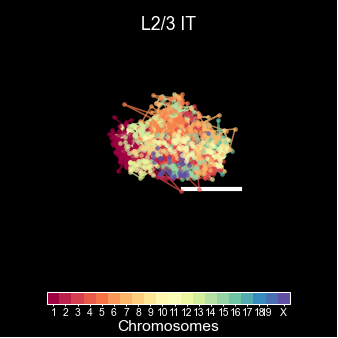

0.0 0.5235987755982988


In [44]:

from matplotlib.colors import BoundaryNorm
from matplotlib import animation
plot_animation = False
hide_axes = True
add_refBar = True
refBar_len = 5 # in um
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
_chr_2_color = {_key:genome_cmap((sort_chr(_key)-1)/22) for _key in sorted(_dict.keys(), key = lambda v:sort_chr(v))}

plot_radius = 6

marker_size = 5
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(_single_col_width, _single_col_width), dpi=150)

ax3d = fig.add_subplot(111, projection='3d', azim=0, elev=30)
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
# turn off axes if needed
if hide_axes:
    ax3d.set_axis_off()
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_chr(v)):
    _zxys_list = _centered_dict[_chr]
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
ax3d.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
# title
ax3d.set_title(f"{sel_subclass}" ,fontsize=_font_size+1, pad=0)
# colorbar
bounds = [sort_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = BoundaryNorm(bounds, genome_cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=genome_cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_chr(v))), fontsize=_font_size)

cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                    width=_ticklabel_width, length=_ticklabel_size/2,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

# save
fig_basename = f"Decode3D_type_{sel_subclass.replace(' ', '_').replace(r'/', '-')}_cell_{_sel_cell_ind}"
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(example_figure_folder, fig_basename+".gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # add ref
    if add_refBar:
        # convert to degree, which matches numpy cos and sin
        _azim = (ax3d.azim%360) / 180 * np.pi 
        _elev = (ax3d.elev%360) / 180 * np.pi
        print(_azim, _elev)
        # start coordinate for colorbar
        _bar_starts = np.array([-0.99, # z, draw to the bottom
                                -np.sin(_azim), # x, y, extension goes through 0,0
                                np.cos(_azim), 
                                ]) * plot_radius
        # ongoing vector for colorbar:
        _bar_vector = np.array([0,
                                np.sin(_azim),
                                -np.cos(_azim),
                                ]) * refBar_len
        # therefore, end of colorbar
        _bar_ends = _bar_starts + _bar_vector
        #print(_bar_starts, _bar_ends)
        _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                              [_bar_starts[2], _bar_ends[2]], 
                              [_bar_starts[0], _bar_ends[0]], 
                              color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                              linewidth=2)

    # save pdf and png
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".pdf"),
                transparent=False, bbox_inches='tight', pad_inches=0)
    fig.savefig(os.path.join(example_figure_folder, fig_basename+".png"),
                transparent=False, bbox_inches='tight', pad_inches=0)
fig.show()

<IPython.core.display.Javascript object>


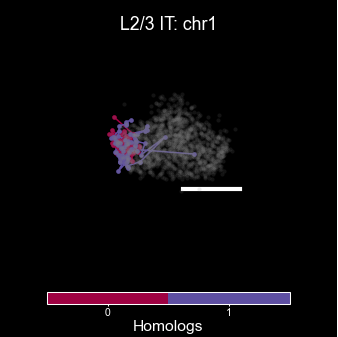

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


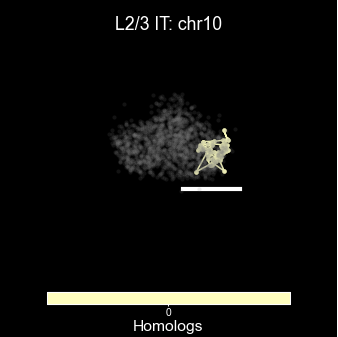

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


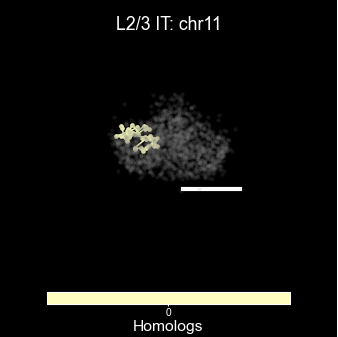

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


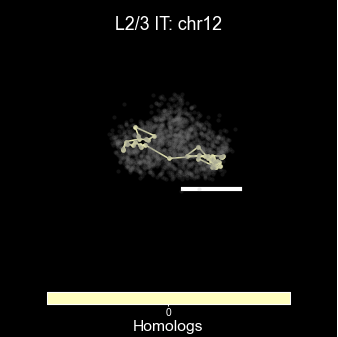

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


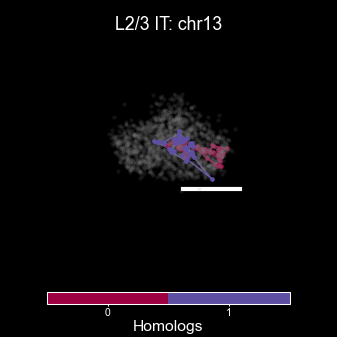

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


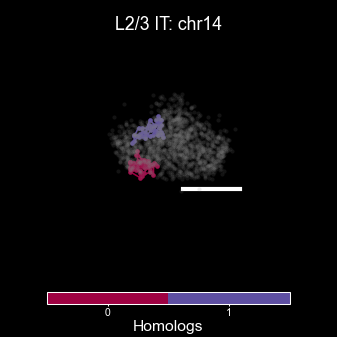

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


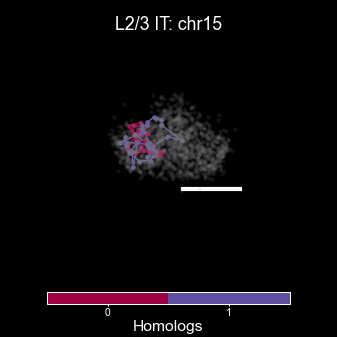

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


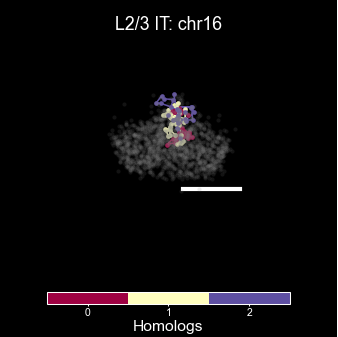

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


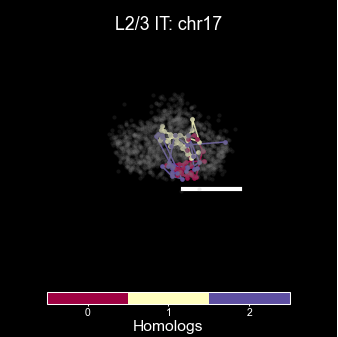

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


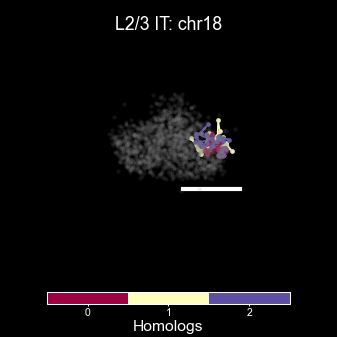

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


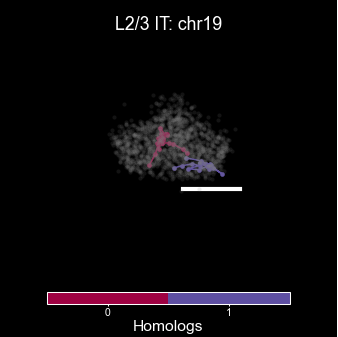

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


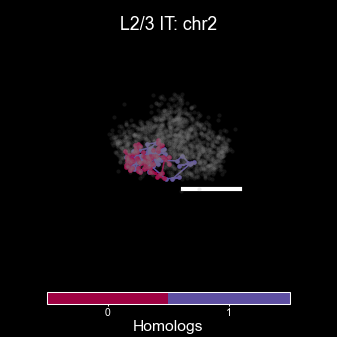

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


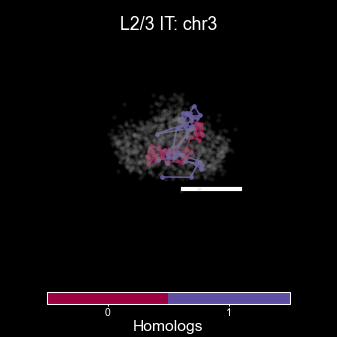

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


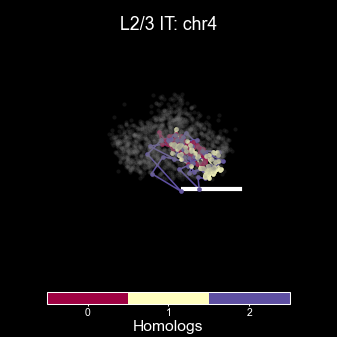

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


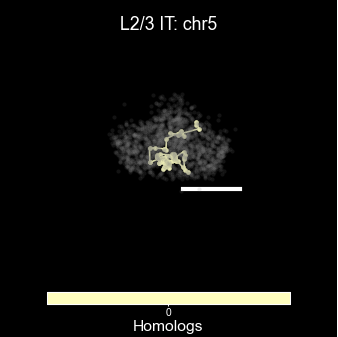

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


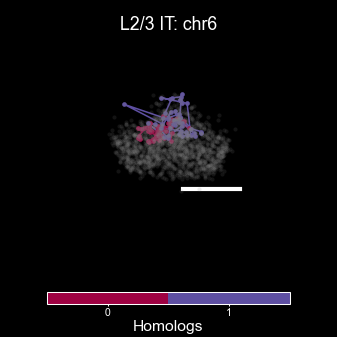

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


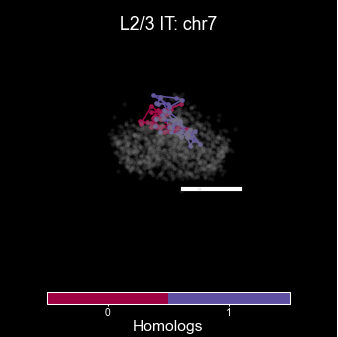

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


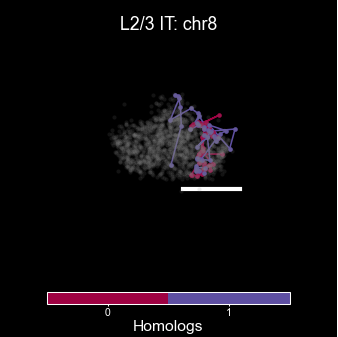

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


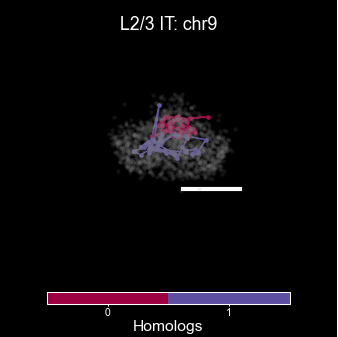

0.0 0.5235987755982988


<IPython.core.display.Javascript object>


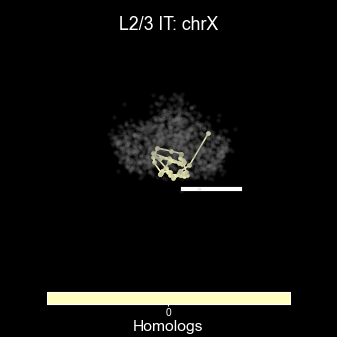

0.0 0.5235987755982988


In [45]:


#_sel_chr = '2'

for _sel_chr in _dict.keys():

    if len(_dict[_sel_chr]) == 1:
        _homolog_2_color = {0:genome_cmap(1/2)}
    else:
        _homolog_2_color = {_i:genome_cmap((_i) / (len(_dict[_sel_chr])-1) ) 
                            for _i in range(len(_dict[_sel_chr]))}


    from matplotlib.colors import BoundaryNorm
    from matplotlib import animation
    plot_animation = False
    hide_axes = True
    add_refBar = True
    refBar_len = 5 # in um
    angle = 3

    _centered_dict = Centering_Chr2ZxysListDict(_dict)
    plot_radius = 6

    marker_size = 5
    marker_alpha = 1

    depthshade=False
    fig = plt.figure(figsize=(_single_col_width, _single_col_width), dpi=150)

    ax3d = fig.add_subplot(111, projection='3d', azim=0, elev=30)
    ax3d.set_facecolor(background_color)
    fig.subplots_adjust(left=0.05, right=0.95, bottom=0, top=0.9)
    # turn off axes if needed
    if hide_axes:
        ax3d.set_axis_off()
    # turn off grid if needed
    ax3d.grid(False)
    ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
    # all spots as ref
    merged_zxys, merged_rids = summarize_chr2Zxys(_centered_dict, codebook, keep_valid=True)
    merged_zxys = merged_zxys
    _valid_inds = (np.isnan(merged_zxys).sum(1) == 0)
    _sc = ax3d.scatter(merged_zxys[_valid_inds,1], merged_zxys[_valid_inds,2], merged_zxys[_valid_inds,0],
                       color='Grey', 
                       s=marker_size-1, depthshade=depthshade, 
                       alpha=0.15,
                       linewidth=0, label=f"genome")

    # scatter plot
    _zxys_list = _centered_dict[_sel_chr]
    for _ihomo, _zxys in enumerate(_zxys_list):
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=_homolog_2_color[_ihomo], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"h_{_ihomo}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=_homolog_2_color[_ihomo], linewidth=0.75, alpha=marker_alpha)

    ax3d.tick_params('both', labelsize=_font_size-0.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in ax3d.spines.items()]

    # axes limits
    ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
    ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
    ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
    # axes ticks
    ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
    ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
    # axes labels
    ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=0)
    ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size, labelpad=0)
    # title
    ax3d.set_title(f"{sel_subclass}: chr{_sel_chr}" ,fontsize=_font_size+1, pad=0)
    # colorbar
    if len(_dict[_sel_chr]) == 1:
        bounds = [-1,0]
    else:
        bounds = list(np.arange(len(_dict[_sel_chr])+1 ))
    #bounds.append(np.max(bounds)+1)
    bounds = np.sort(bounds)
    norm = BoundaryNorm(bounds, genome_cmap.N)
    cbar_shrink = 0.8
    m = cm.ScalarMappable(cmap=genome_cmap, norm=norm)
    cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                        ticks=bounds[:-1]+0.5,
                        boundaries=bounds,
                        shrink=cbar_shrink)
    cbar.set_label('Homologs', fontsize=_font_size, labelpad=1,)
    cbar.ax.set_xticklabels(np.arange(len(_dict[_sel_chr])), fontsize=_font_size)
    cbar.ax.tick_params('both', labelsize=_font_size-2.5, 
                        width=_ticklabel_width, length=_ticklabel_size/2,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(0.5) for i in cbar.ax.spines.items()]

    # save
    fig_basename = f"Decode3D_type_{sel_subclass.replace(' ', '_').replace(r'/', '-')}_cell_{_sel_cell_ind}_chr_{_sel_chr}"

    # animation
    if plot_animation:
        def rotate3D(angle):
             ax3d.view_init(azim=angle)
        ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
        ani.save(os.path.join(example_figure_folder, fig_basename+".gif"), 
                 writer=animation.PillowWriter(fps=30), )
    else:
        # add ref
        if add_refBar:
            # convert to degree, which matches numpy cos and sin
            _azim = (ax3d.azim%360) / 180 * np.pi 
            _elev = (ax3d.elev%360) / 180 * np.pi
            print(_azim, _elev)
            # start coordinate for colorbar
            _bar_starts = np.array([-0.99, # z, draw to the bottom
                                    -np.sin(_azim), # x, y, extension goes through 0,0
                                    np.cos(_azim), 
                                    ]) * plot_radius
            # ongoing vector for colorbar:
            _bar_vector = np.array([0,
                                    np.sin(_azim),
                                    -np.cos(_azim),
                                    ]) * refBar_len
            # therefore, end of colorbar
            _bar_ends = _bar_starts + _bar_vector
            #print(_bar_starts, _bar_ends)
            _ref_line = ax3d.plot([_bar_starts[1], _bar_ends[1]],
                                  [_bar_starts[2], _bar_ends[2]], 
                                  [_bar_starts[0], _bar_ends[0]], 
                                  color=tuple([1-_c for _c in ax3d.get_facecolor()[:3]]+[1]), 
                                  linewidth=2)

        # save pdf and png
        fig.savefig(os.path.join(example_figure_folder, fig_basename+".pdf"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
        fig.savefig(os.path.join(example_figure_folder, fig_basename+".png"),
                    transparent=False, bbox_inches='tight', pad_inches=0)
    fig.show()

In [10]:
from ImageAnalysis3.structure_tools.distance import sort_mouse_chr
reload(structure_tools.distance)

<module 'ImageAnalysis3.structure_tools.distance' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\structure_tools\\distance.py'>

In [11]:
cmap = copy.copy(cm.Spectral)
chr_2_color = {_key:cmap((sort_mouse_chr(_key)-1)/20) for _key in sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))}

In [12]:
def Centering_Chr2ZxysListDict(chr_2_zxys_list):
    # center
    
    _all_zxys = []
    for _zxys_list in chr_2_zxys_list.values():
        _all_zxys.extend(list(_zxys_list))
    _center = np.nanmean(np.concatenate(_all_zxys), axis=0)
    _centered_dict = {}
    for _chr, _zxys_list in chr_2_zxys_list.items():
        _centered_dict[_chr] = _zxys_list - _center[np.newaxis,:]
        
    return _centered_dict


In [13]:
figure_folder = r'D:\20220611-Plots'
decoded_figure_folder = os.path.join(figure_folder, 'Decoded_3D')
if not os.path.exists(decoded_figure_folder):
    os.makedirs(decoded_figure_folder)

<IPython.core.display.Javascript object>


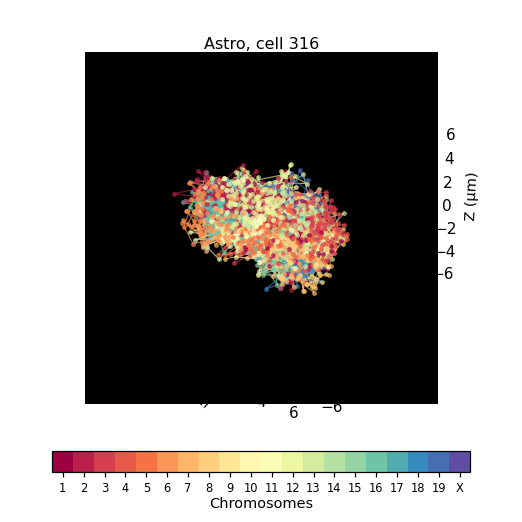

In [14]:
# select cell
#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Astro'
_cell_ind = 316
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)

ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"{_chr}")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


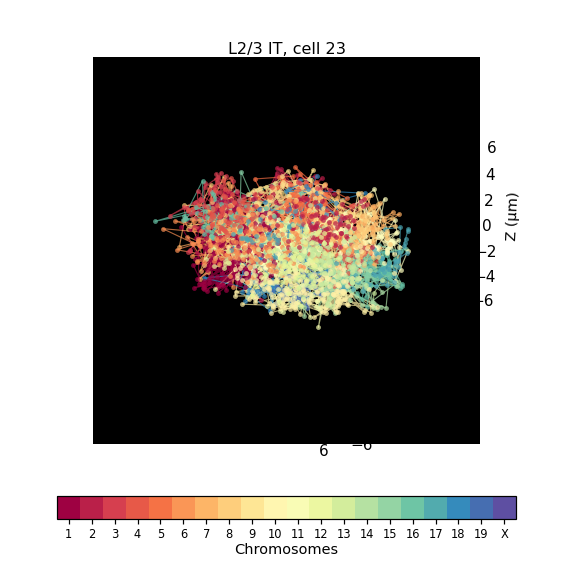

In [15]:
# select cell
#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'L2/3 IT'
_cell_ind = 23
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


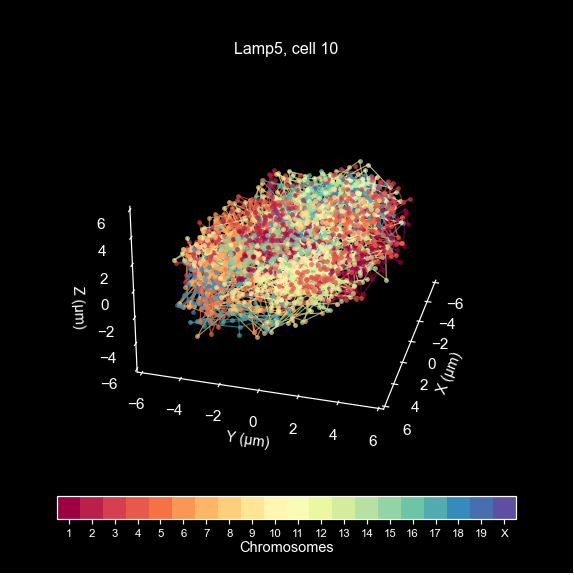

In [270]:
# select cell

_cell_type = 'Lamp5'
_cell_ind = 10
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 0.7

depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=0.75, alpha=marker_alpha)
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)
    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.gif"), 
             writer=animation.PillowWriter(fps=30), )
else:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}.png"),
                transparent=True)
fig.show()

<IPython.core.display.Javascript object>


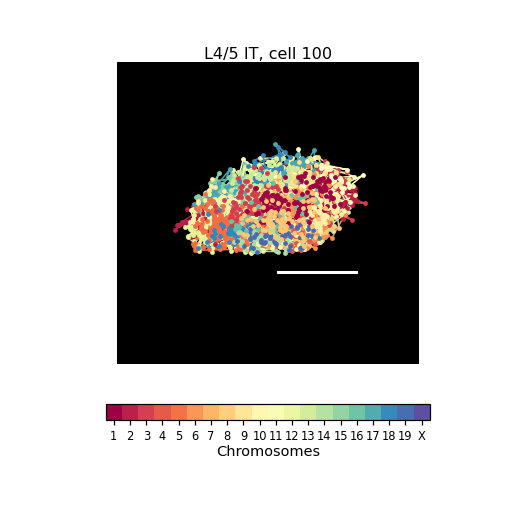

In [32]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'L4/5 IT'
_cell_ind = 100
_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))

# save pdf and png
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
            transparent=True)
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
            transparent=True)
fig.show()

<IPython.core.display.Javascript object>


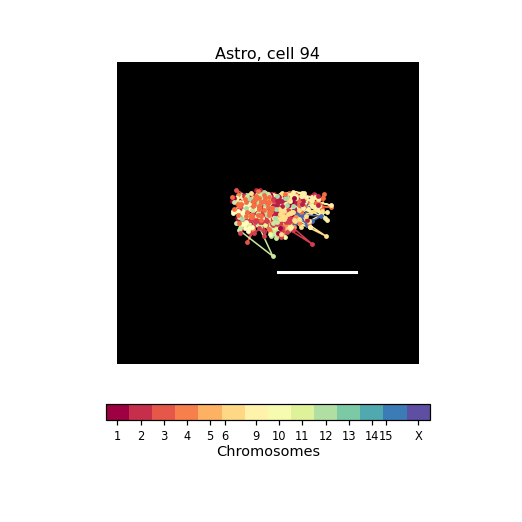

In [79]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Astro'
_cell_ind = 94

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))

# save pdf and png
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
            transparent=True)
fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
            transparent=True)
fig.show()

<IPython.core.display.Javascript object>


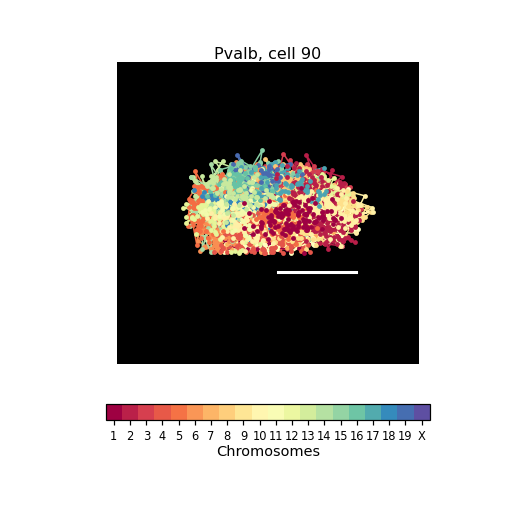

In [111]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Pvalb'
_cell_ind = 90

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = True

angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

<IPython.core.display.Javascript object>


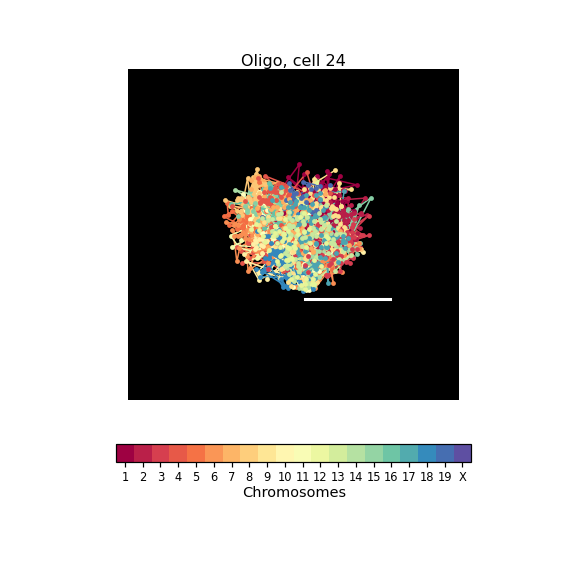

In [104]:
# select cell

#plt.style.use('dark_background')
plt.style.use('default')

_cell_type = 'Oligo'
_cell_ind = 24

_dict = zxys_dict[_cell_type][_cell_ind]


from matplotlib import animation
plot_animation = False
save_plot = True

angle = 3

_centered_dict = Centering_Chr2ZxysListDict(_dict)
plot_radius = 6

marker_size = 10
marker_alpha = 1
line_width = 1
depthshade=False
fig = plt.figure(figsize=(figure_width, figure_width), dpi=figure_dpi)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_facecolor(background_color)
ax3d.set_axis_off()
ax3d.view_init(0,90)
# turn off grid if needed
ax3d.grid(False)
ax3d.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax3d.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
# scatter plot
for _chr in sorted(_centered_dict.keys(), key = lambda v:sort_mouse_chr(v)):
    _zxys_list = _centered_dict[_chr]/1000
    for _zxys in _zxys_list:
        #print(_chr)
        _valid_inds = (np.isnan(_zxys).sum(1) == 0)
        _sc = ax3d.scatter(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                           color=chr_2_color[_chr], 
                           s=marker_size, depthshade=depthshade, 
                           alpha=marker_alpha,
                           #edgecolors=_edge_colors, 
                           linewidth=0, label=f"_chr")
        _ln = ax3d.plot(_zxys[_valid_inds,1], _zxys[_valid_inds,2], _zxys[_valid_inds,0],
                        color=chr_2_color[_chr], linewidth=line_width, alpha=marker_alpha)
# add reference_bar
_ref_bar_len = 5
_ref_bar_width=2
_ref_ln = ax3d.plot(
                    [-plot_radius*0.9+_ref_bar_len, -plot_radius*0.9],
                    [0,0],
                    [-plot_radius*0.9, -plot_radius*0.9], 
                    color=[1,1,1],
                    linewidth=_ref_bar_width,
                   )
# axes limits
ax3d.axes.set_xlim3d(left=-plot_radius, right=plot_radius) 
ax3d.axes.set_ylim3d(bottom=-plot_radius, top=plot_radius) 
ax3d.axes.set_zlim3d(bottom=-plot_radius, top=plot_radius) 
# axes ticks
ax3d.set_xticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_yticks(np.arange(-plot_radius,plot_radius+1, 2))
ax3d.set_zticks(np.arange(-plot_radius,plot_radius+1, 2))
# axes labels
ax3d.set_xlabel(f"X (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size+2, labelpad=1)
ax3d.set_zlabel(f"Z (\u03BCm)", fontsize=_font_size+2, labelpad=1)
# title
ax3d.set_title(f"{_cell_type}, cell {_cell_ind}" ,fontsize=_font_size+3, pad=0)
# colorbar
bounds = [sort_mouse_chr(_chr) for _chr in _centered_dict.keys()]
bounds.append(np.max(bounds)+1)
bounds = np.sort(bounds)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cbar_shrink = 0.8
m = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(m, ax=ax3d, orientation='horizontal', pad=0.1, 
                    ticks=bounds[:-1]+0.5,
                    boundaries=bounds,
                    shrink=cbar_shrink)
cbar.set_label('Chromosomes', fontsize=_font_size+2, labelpad=1,)
cbar.ax.set_xticklabels(list(sorted(_dict.keys(), key = lambda v:sort_mouse_chr(v))), fontsize=_font_size)
# animation
if plot_animation:
    def rotate3D(angle):
         ax3d.view_init(azim=angle)

    ani = animation.FuncAnimation(fig, rotate3D, frames=np.arange(0, 360*2, angle), interval=50)
    ani.save(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.gif"), 
             writer=animation.PillowWriter(fps=30))
if save_plot:
    # save pdf and png
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.pdf"),
                transparent=True)
    fig.savefig(os.path.join(decoded_figure_folder, f"Decode3D_type_{_cell_type.replace(' ', '_').replace(r'/', '-')}_ind_{_cell_ind}_clear.png"),
                transparent=True)
#fig.show()

# Rotating gif

In [228]:


    #ax3d.

In [227]:
ax3d.azim

-60

In [238]:
np.arange(0, 360*2, angle).shape

(72,)